# On The Plague Trail

<h1>1. Business Problem </h1>
<h2> 1.1 Problem Description </h2>
<p> <b>Predict the total number of people infected by the 7 different pathogens.</b></p>

<p>Plague is an epidemic event caused by Bacteria. A group of senior scientists misplaced a package containing fatal plague bacteria during one of their trips. With no means of tracking where the package is, scientists are now trying to come up with a solution to stop the plague. This plague has 7 different strains that are unique for each continent. This strain is expanding rapidly in each continent.</p>

<h2> 1.2 Problem Statement </h2>

<p>The dataset contains escalations of the plague for all the seven strains. The dataset is a time series in which the training set contains the number of individuals that are infected by the plague over a defined period of time.

Your mission, should you choose to accept it, is to defend the world against this plague by building an algorithm that can minimize the damage.</p>

<h2> 1.3 Data Description </h2>
<p>You can find the dataset : https://www.kaggle.com/shivammittal99/hackerearth-on-the-plague-trail#train.csv</p>


<h2>1.4 Real world/Business Objectives and constraints  </h2>
Objectives:
1. Predict the columns of PA, PB, PC, PD, PE, PF, PG.
2. Minimize the difference between predicted and actual values (RMSE and MAPE)


<h2>1.5 Column Description </h2>

<b>ID</b>: <p>A calculated unique ID for each research.</p>

<b>DateTime</b>: <p>Represents the data and time on which the event is recorded</p>

<b>TempOut</b>: <p>Outside Temperature</p>

<b>HiTemp</b>: <p>Highest Temperature</p>

<b>LowTemp</b>: <p>Lowest Temperature</p>

<b>OutHum</b>: <p>Outside Humidity</p>

<b>DewPt</b>: <p>Dew Point</p>

<b>WindSpeed</b>: <p>Wind Speed</p>

<b>WindDir</b>: <p>Wind Direction</p>

<b>WindRun</b>: <p>Wind Run Flow</p>

<b>HiSpeed</b>: <p>Highest Speed of the wind</p>

<b>HiDir</b>: <p>Direction of the wind which has highest speed</p>

<b>WindChill</b>: <p>Chillness of the wind</p>

<b>HeatIndex</b>: <p>Heat Index</p>

<b>THWIndex</b>: <p>THW Index</p>

<b>Bar</b>: <p>Barometer Reading</p>

<b>Rain</b>: <p>Rain</p>

<b>RainRate</b>: <p>Frequency of Rain</p>

<b>HeatDD</b>: <p>Heat DD</p>

<b>CoolDD</b>: <p>Cool DD</p>

<b>InTemp</b>: <p>Temperature Inside</p>

<b>InHum</b>: <p>Humidity Inside</p>

<b>InDew</b>: <p>Dew Inside</p>

<b>InHeat</b>: <p>Heat Inside</p>

<b>InEMC</b>: <p>EMC Inside</p>

<b>InAirDensity</b>: <p>Air Density</p>

<b>WindSamp</b>: <p>Wind - Attribute 1</p>

<b>WindTx</b>: <p>Wind - Attribute 2</p>

<b>ISSRecpt</b>: <p>Reception</p>

<b>ArcInt</b>: <p>Attribute</p>

<b>PA</b>: <p>Total No of People infected by Pathogen A</p>

<b>PB</b>: <p>Total No of People infected by Pathogen B</p>

<b>PC</b>: <p>Total No of People infected by Pathogen C</p>

<b>PD</b>: <p>Total No of People infected by Pathogen D</p>

<b>PE</b>: <p>Total No of People infected by Pathogen E</p>

<b>PF</b>: <p>Total No of People infected by Pathogen F</p>

<b>PG</b>: <p>Total No of People infected by Pathogen G</p>

<h2>1.6 Mapping the real world problem to a Machine Learning Problem </h2>

<pre>
We need to predict the number of people affected by pathogens (PA,PB,PC,PD,PE,PF,PG). 
It is a Regression problem 
</pre>

In [2]:
#import all the necessary packages.

from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import math
import time
import re
import os
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity  
from sklearn.metrics import pairwise_distances
from matplotlib import gridspec
from scipy.sparse import hstack
import plotly
import plotly.figure_factory as ff
from plotly.graph_objs import Scatter, Layout

plotly.offline.init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")

In [3]:
import os
os.chdir('C:/Users/kingsubham27091995/Desktop/AppliedAiCouse/CASE STUDIES/On the Plague trail')

In [4]:
train_data=pd.read_csv("train.csv")

In [5]:
print("Number of data points:{0} and Number of features:{1}".format(train_data.shape[0],train_data.shape[1]))

Number of data points:40000 and Number of features:37


In [5]:
train_data.head(5)

,ID,DateTime,TempOut,HiTemp,LowTemp,OutHum,DewPt,WindSpeed,WindDir,WindRun,...,WindTx,ISSRecpt,ArcInt,PA,PB,PC,PD,PE,PF,PG
0,PR00001,07-12-2040 0:15,53.5,53.6,53.5,85,49.1,2,SSE,0.5,...,1,100.0,15,1,1,1,1,1,1,1
1,PR00002,07-12-2040 0:30,53.5,53.5,53.4,85,49.1,2,SSE,0.5,...,1,100.0,15,1,1,1,1,1,1,1
2,PR00003,07-12-2040 0:45,53.3,53.5,53.2,85,48.9,2,SSE,0.5,...,1,100.0,15,1,1,1,1,1,1,1
3,PR00004,07-12-2040 1:00,53.1,53.3,53.0,86,49.0,2,S,0.5,...,1,100.0,15,1,1,1,1,1,1,1
4,PR00005,07-12-2040 1:15,52.9,53.1,52.9,86,48.8,2,S,0.5,...,1,100.0,15,1,1,1,1,1,1,1


In [6]:
train_data.tail(5)

,ID,DateTime,TempOut,HiTemp,LowTemp,OutHum,DewPt,WindSpeed,WindDir,WindRun,...,WindTx,ISSRecpt,ArcInt,PA,PB,PC,PD,PE,PF,PG
39995,PR39996,04-01-2042 0:00,55.0,55.1,55.0,88,51.5,1,SSE,0.25,...,1,100.0,15,2978,1439,785,470,303,207,148
39996,PR39997,04-04-2042 12:00,60.1,60.5,59.1,72,51.0,3,SSE,0.75,...,1,100.0,15,2979,1439,785,470,303,207,148
39997,PR39998,08-04-2041 10:30,79.6,79.6,75.6,40,53.1,1,S,0.25,...,1,100.0,15,2979,1440,785,470,303,207,148
39998,PR39999,08-04-2041 11:00,81.2,82.0,80.6,38,53.2,3,SSE,0.75,...,1,100.0,15,2980,1440,786,470,303,207,148
39999,PR40000,08-04-2041 11:15,82.9,83.0,80.9,37,54.0,3,SSE,0.75,...,1,100.0,15,2980,1440,786,470,303,207,148


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 37 columns):
ID              40000 non-null object
DateTime        40000 non-null object
TempOut         40000 non-null float64
HiTemp          40000 non-null float64
LowTemp         40000 non-null float64
OutHum          40000 non-null int64
DewPt           40000 non-null float64
WindSpeed       40000 non-null int64
WindDir         40000 non-null object
WindRun         40000 non-null float64
HiSpeed         40000 non-null int64
HiDir           40000 non-null object
WindChill       40000 non-null float64
HeatIndex       40000 non-null float64
THWIndex        40000 non-null float64
Bar             40000 non-null float64
Rain            40000 non-null float64
RainRate        40000 non-null float64
HeatDD          40000 non-null float64
CoolDD          40000 non-null float64
InTemp          40000 non-null float64
InHum           40000 non-null int64
InDew           40000 non-null float64
InHeat

## Basic statistics for each features

In [8]:
for i in train_data.columns:
    print("Basic statistics for feature : {0}".format(i))
    print(train_data[i].describe())
    print("---------------------------------------------")

Basic statistics for feature : ID
count       40000
unique      40000
top       PR35754
freq            1
Name: ID, dtype: object
---------------------------------------------
Basic statistics for feature : DateTime
count               40000
unique              40000
top       02-08-2041 3:30
freq                    1
Name: DateTime, dtype: object
---------------------------------------------
Basic statistics for feature : TempOut
count    40000.000000
mean        58.508625
std         12.119640
min         29.300000
25%         51.100000
50%         56.400000
75%         65.300000
max        110.300000
Name: TempOut, dtype: float64
---------------------------------------------
Basic statistics for feature : HiTemp
count    40000.000000
mean        58.975230
std         12.323427
min         29.500000
25%         51.300000
50%         56.800000
75%         66.000000
max        111.000000
Name: HiTemp, dtype: float64
---------------------------------------------
Basic statistics for fea

In [9]:
train_data.isnull().sum()

ID              0
DateTime        0
TempOut         0
HiTemp          0
LowTemp         0
OutHum          0
DewPt           0
WindSpeed       0
WindDir         0
WindRun         0
HiSpeed         0
HiDir           0
WindChill       0
HeatIndex       0
THWIndex        0
Bar             0
Rain            0
RainRate        0
HeatDD          0
CoolDD          0
InTemp          0
InHum           0
InDew           0
InHeat          0
InEMC           0
InAirDensity    0
WindSamp        0
WindTx          0
ISSRecpt        0
ArcInt          0
PA              0
PB              0
PC              0
PD              0
PE              0
PF              0
PG              0
dtype: int64

## Checking for Skewness and Log Transformations: 

For PA
Skew is: 2.1808251642863983


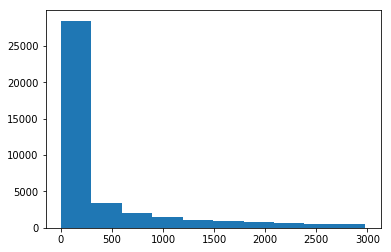

For PA after log transformation
Skew is: 0.09780414828042107


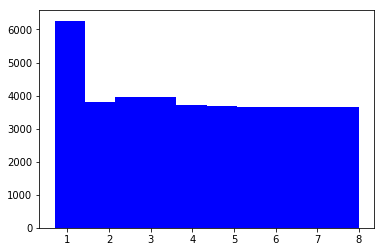

For PB
Skew is: 2.0367205108020845


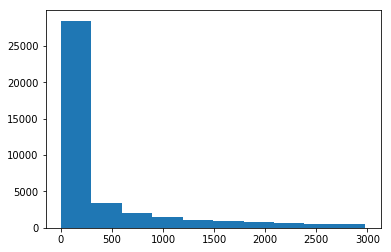

For PB after log transformation
Skew is: 0.09780414828042107


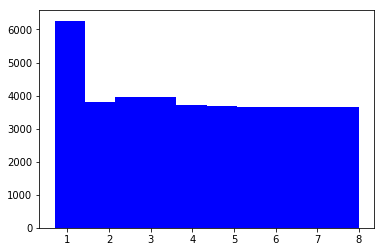

For PC
Skew is: 1.9103130220711935


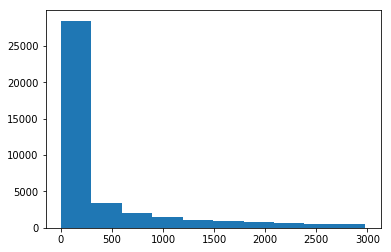

For PC after log transformation
Skew is: 0.09780414828042107


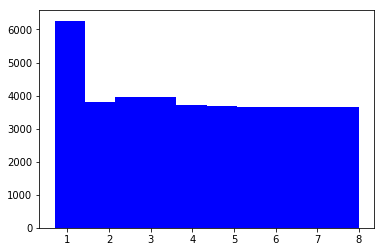

For PD
Skew is: 1.7983386554551613


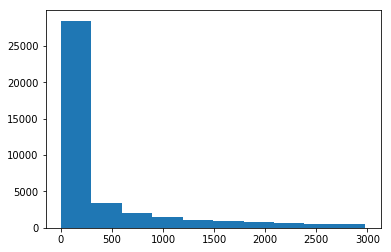

For PD after log transformation
Skew is: 0.09780414828042107


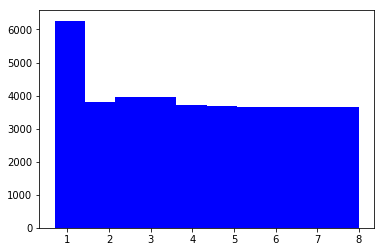

For PE
Skew is: 1.6983667147272488


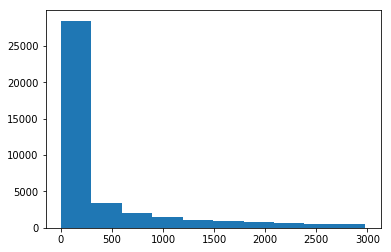

For PE after log transformation
Skew is: 0.09780414828042107


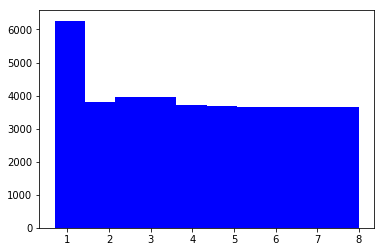

For PF
Skew is: 1.60844986096591


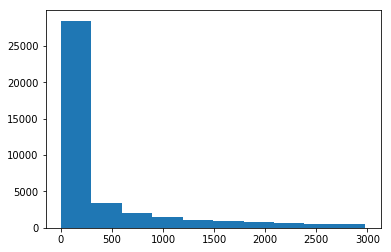

For PF after log transformation
Skew is: 0.09780414828042107


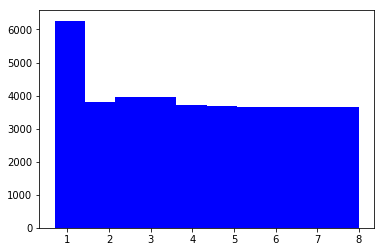

For PG
Skew is: 1.5271096920926972


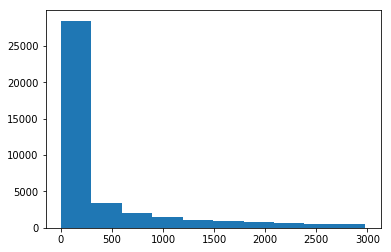

For PG after log transformation
Skew is: 0.09780414828042107


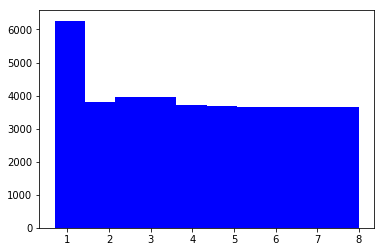

In [6]:
# Determining the Skewness of data 
outputs= ["PA","PB","PC","PD","PE","PF","PG"]
for result in outputs:
    print("For "+ result)
    print("="*50)
    print ("Skew is:", train_data[result].skew())
    plt.hist(train_data.PA)
    plt.show()
    
    print("For "+result+" after log transformation")
    print("="*50)
    # After log transformation of the data it looks much more center aligned
    train_data['Skewed_PA'] = np.log(train_data['PA']+1)
    print ("Skew is:", train_data['Skewed_PA'].skew())
    plt.hist(train_data['Skewed_PA'], color='blue')
    plt.show()

### Converting to Date Format

In [7]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='DateTime' else x for x in list(train_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039

train_data['Date'] = pd.to_datetime(train_data['DateTime'])
train_data.drop('DateTime', axis=1, inplace=True)
#train_data.sort_values(by=['DateTime'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
train_data = train_data[cols]


train_data.head(2)

,ID,Date,TempOut,HiTemp,LowTemp,OutHum,DewPt,WindSpeed,WindDir,WindRun,...,ISSRecpt,ArcInt,PA,PB,PC,PD,PE,PF,PG,Skewed_PA
0,PR00001,2040-07-12 00:15:00,53.5,53.6,53.5,85,49.1,2,SSE,0.5,...,100.0,15,1,1,1,1,1,1,1,0.693147
1,PR00002,2040-07-12 00:30:00,53.5,53.5,53.4,85,49.1,2,SSE,0.5,...,100.0,15,1,1,1,1,1,1,1,0.693147


In [8]:
train_data['Year'] = train_data['Date'].dt.year

In [9]:
train_data['Month'] = train_data['Date'].dt.month
train_data['Day'] = train_data['Date'].dt.day

In [10]:
train_data.head(2)

,ID,Date,TempOut,HiTemp,LowTemp,OutHum,DewPt,WindSpeed,WindDir,WindRun,...,PB,PC,PD,PE,PF,PG,Skewed_PA,Year,Month,Day
0,PR00001,2040-07-12 00:15:00,53.5,53.6,53.5,85,49.1,2,SSE,0.5,...,1,1,1,1,1,1,0.693147,2040,7,12
1,PR00002,2040-07-12 00:30:00,53.5,53.5,53.4,85,49.1,2,SSE,0.5,...,1,1,1,1,1,1,0.693147,2040,7,12


In [14]:
import pandas_profiling as pp
pp.ProfileReport(train_data)

Number of variables,40
Number of observations,40000
Total Missing (%),0.0%
Total size in memory,12.2 MiB
Average record size in memory,320.0 B
Numeric,19
Categorical,2
Boolean,0
Date,1
Text (Unique),1
Rejected,17


## Inferences:
1. 'THWIndex' is highly correlated with HeatIndex (ρ = 0.99897) , so we can reject any 1 row
1. 'WindChill' is highly correlated with LowTemp (ρ = 0.99687)
1. 'HiTemp' is highly correlated with TempOut (ρ = 0.99902)
1. 'AcrInt' has constant value 15. So, we can reject it
1. WindTx has constant value 1
1. Rain has 39022 / 97.6% zeros
1. RainRate has 39295 / 98.2% zeros

## Checking Distribution Graphs

In [13]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

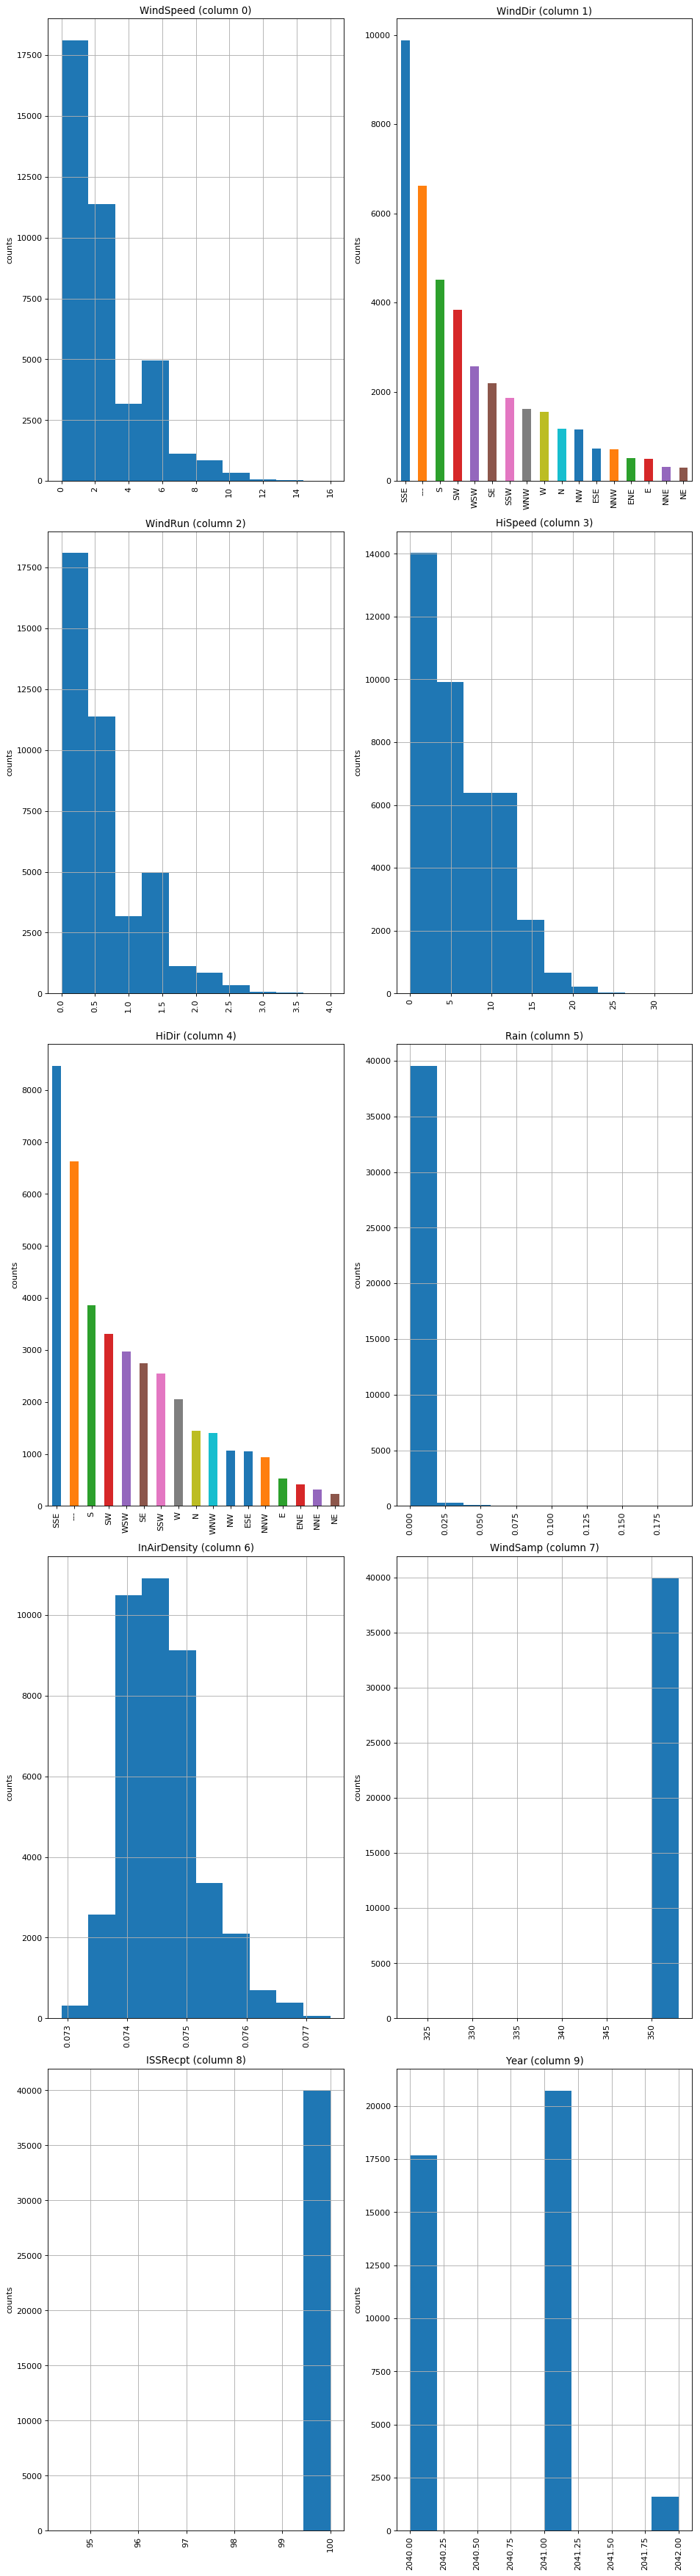

In [14]:
plotPerColumnDistribution(train_data, 10, 2)

In [11]:
train_data.columns

Index(['ID', 'Date', 'TempOut', 'HiTemp', 'LowTemp', 'OutHum', 'DewPt',
       'WindSpeed', 'WindDir', 'WindRun', 'HiSpeed', 'HiDir', 'WindChill',
       'HeatIndex', 'THWIndex', 'Bar', 'Rain', 'RainRate', 'HeatDD', 'CoolDD',
       'InTemp', 'InHum', 'InDew', 'InHeat', 'InEMC', 'InAirDensity',
       'WindSamp', 'WindTx', 'ISSRecpt', 'ArcInt', 'PA', 'PB', 'PC', 'PD',
       'PE', 'PF', 'PG', 'Skewed_PA', 'Year', 'Month', 'Day'],
      dtype='object')

### Categorical Features

In [12]:
train_data.select_dtypes(include=['O']).columns.values

array(['ID', 'WindDir', 'HiDir'], dtype=object)

### Numerical Features

In [20]:
numerical_features = train_data.select_dtypes(include=[np.number])
numerical_features.dtypes

TempOut         float64
HiTemp          float64
LowTemp         float64
OutHum            int64
DewPt           float64
WindSpeed         int64
WindRun         float64
HiSpeed           int64
WindChill       float64
HeatIndex       float64
THWIndex        float64
Bar             float64
Rain            float64
RainRate        float64
HeatDD          float64
CoolDD          float64
InTemp          float64
InHum             int64
InDew           float64
InHeat          float64
InEMC           float64
InAirDensity    float64
WindSamp          int64
WindTx            int64
ISSRecpt        float64
ArcInt            int64
PA                int64
PB                int64
PC                int64
PD                int64
PE                int64
PF                int64
PG                int64
Skewed_PA       float64
Year              int64
Month             int64
Day               int64
dtype: object

## BarPlots

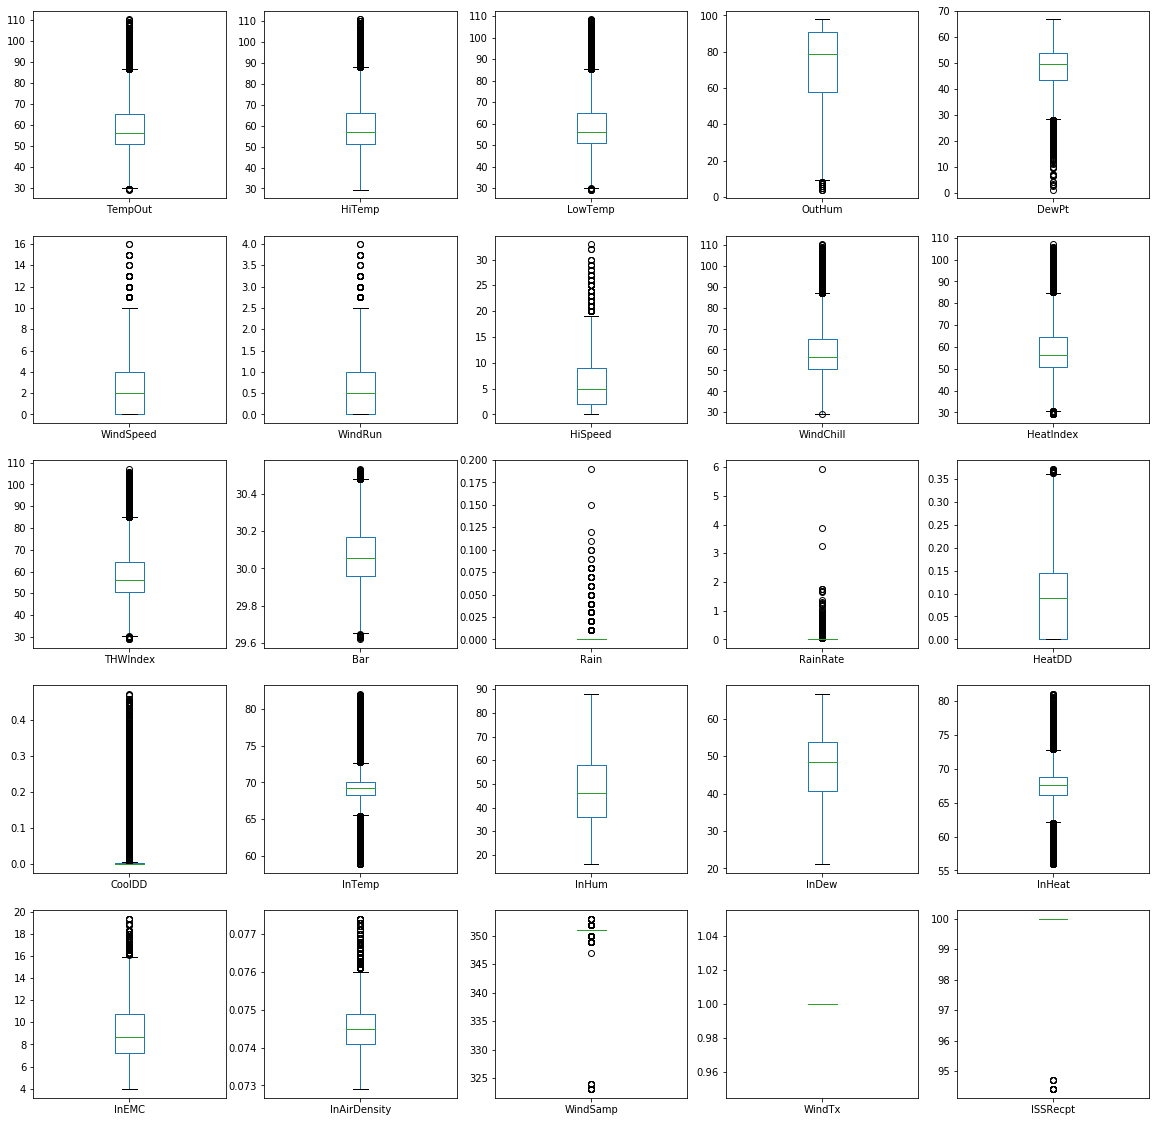

In [6]:
fig, axarr = plt.subplots(5,5, figsize=(20, 20))
cols = ['TempOut', 'HiTemp', 'LowTemp', 'OutHum', 'DewPt',
       'WindSpeed', 'WindRun', 'HiSpeed', 'WindChill',
       'HeatIndex', 'THWIndex', 'Bar', 'Rain', 'RainRate', 'HeatDD', 'CoolDD',
       'InTemp', 'InHum', 'InDew', 'InHeat', 'InEMC', 'InAirDensity',
       'WindSamp', 'WindTx', 'ISSRecpt']
k = 0
for i in range(0,5):
    for j in range(0,5):
        train_data[cols[k]].plot.box(ax=axarr[i][j])
        k = k + 1

### Let's view some features

In [20]:
train_data['WindDir'].value_counts()

SSE    9870
---    6625
S      4513
SW     3842
WSW    2567
SE     2188
SSW    1860
WNW    1609
W      1549
N      1172
NW     1148
ESE     724
NNW     714
ENE     508
E       494
NNE     320
NE      297
Name: WindDir, dtype: int64

> 6625 values are missing in this feature

In [30]:
train_data['Rain'].value_counts()

0.00    39022
0.01      545
0.02      188
0.03       95
0.04       65
0.05       37
0.06       18
0.08       11
0.07       10
0.10        3
0.09        2
0.12        1
0.15        1
0.19        1
0.11        1
Name: Rain, dtype: int64

> Maximum rows are zeros

In [32]:
train_data['RainRate'].value_counts().head(5)

0.00    39295
0.04       82
0.06       51
0.07       41
0.05       41
Name: RainRate, dtype: int64

> Maximum rows are zeros

## Correlation with Output Features: 

In [57]:
zero_feat=[ 'TempOut', 'HiTemp', 'LowTemp', 'OutHum', 'DewPt',
       'WindSpeed', 'WindRun', 'HiSpeed', 'WindChill',
       'HeatIndex', 'THWIndex', 'Bar', 'Rain', 'RainRate', 'HeatDD', 'CoolDD',
       'InTemp', 'InHum', 'InDew', 'InHeat', 'InEMC', 'InAirDensity',
       'WindSamp', 'WindTx', 'ISSRecpt', 'ArcInt', 'Year', 'Month', 'Day']
out_feat=['PA','PB','PC','PD','PE','PF','PG']

In [58]:
from scipy.stats import pearsonr
for i in zero_feat:
    for j in out_feat:   
        corr, _ = pearsonr(train_data[i], train_data[j])
        print('Pearsons correlation of {0} with {1} is {2}'.format(i,j,corr))
    print('-'*60)

Pearsons correlation of TempOut with PA is 0.1910002858025576
Pearsons correlation of TempOut with PB is 0.18772556227103043
Pearsons correlation of TempOut with PC is 0.1833779205680189
Pearsons correlation of TempOut with PD is 0.17826373141140262
Pearsons correlation of TempOut with PE is 0.17269184079347027
Pearsons correlation of TempOut with PF is 0.16701808535621332
Pearsons correlation of TempOut with PG is 0.16099174981231795
------------------------------------------------------------
Pearsons correlation of HiTemp with PA is 0.18918340806814024
Pearsons correlation of HiTemp with PB is 0.18594789469922177
Pearsons correlation of HiTemp with PC is 0.1816503753686059
Pearsons correlation of HiTemp with PD is 0.17659474022835622
Pearsons correlation of HiTemp with PE is 0.17108522044836355
Pearsons correlation of HiTemp with PF is 0.16547264128712647
Pearsons correlation of HiTemp with PG is 0.1595200676181685
------------------------------------------------------------
Pearson

Pearsons correlation of InAirDensity with PG is -0.2003625915456893
------------------------------------------------------------
Pearsons correlation of WindSamp with PA is -0.00015148350449021309
Pearsons correlation of WindSamp with PB is -8.462957406608333e-05
Pearsons correlation of WindSamp with PC is -1.4978061348912962e-05
Pearsons correlation of WindSamp with PD is 1.2126620369934841e-05
Pearsons correlation of WindSamp with PE is 5.508132430222083e-05
Pearsons correlation of WindSamp with PF is 0.00011379113048262728
Pearsons correlation of WindSamp with PG is 0.00020580560555023247
------------------------------------------------------------
Pearsons correlation of WindTx with PA is nan
Pearsons correlation of WindTx with PB is nan
Pearsons correlation of WindTx with PC is nan
Pearsons correlation of WindTx with PD is nan
Pearsons correlation of WindTx with PE is nan
Pearsons correlation of WindTx with PF is nan
Pearsons correlation of WindTx with PG is nan
------------------

## Inference:
1. We can see that columns which has mostly zeros has very low correlation(i.e. in negative or very small positive values) with Output Features
1. Correlation = __'nan'__ , for Features having constant values like 'ArcInt' and 'WindTx'

## Summary: 
1. The Features should be less correlated with other features , but should be highly related with Output features.
 __So, the features which are less related or those who have very less correlation coefficients with respect to Output Features should be carefully handled.__

## Pair Plots for features containing mostly zeros

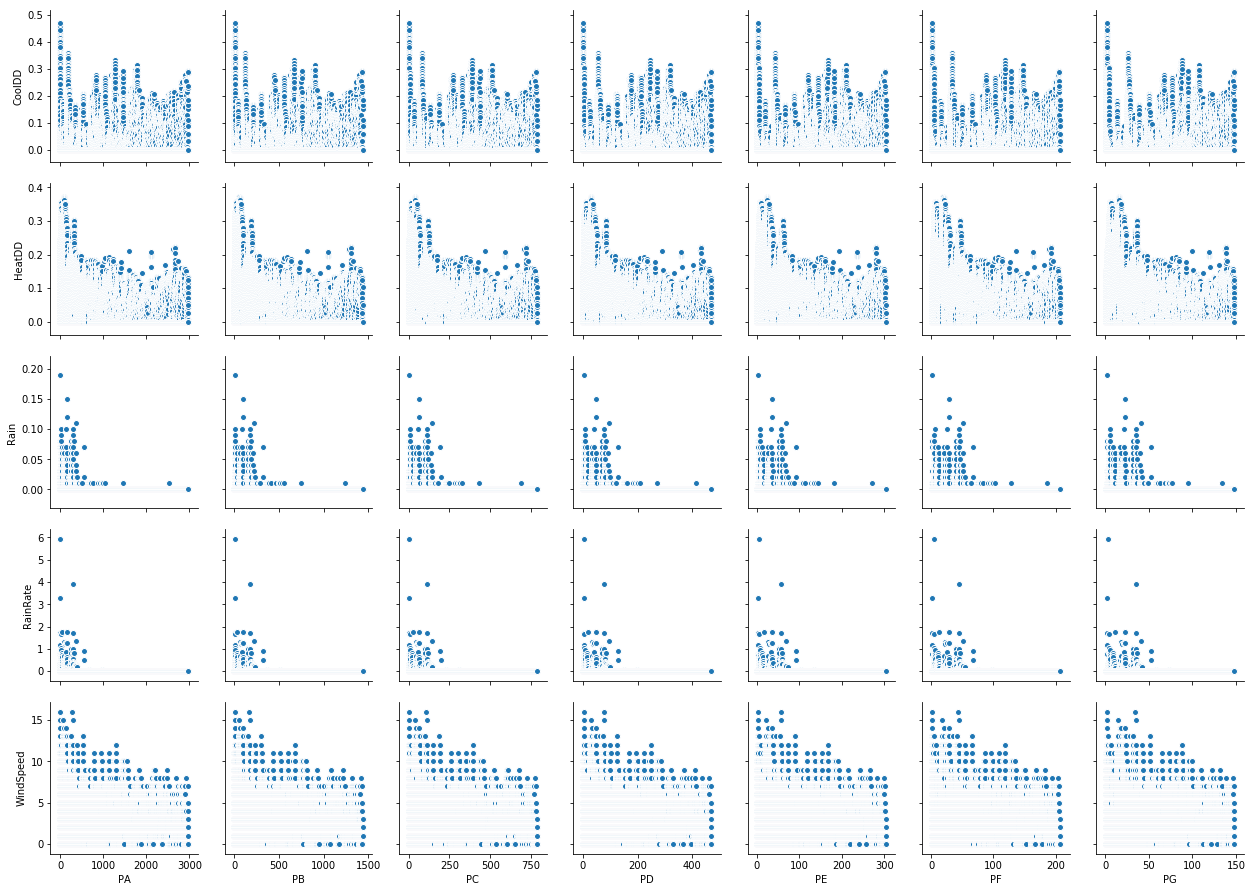

In [14]:
sns.pairplot(train_data, x_vars=['PA','PB','PC','PD','PE','PF','PG'],y_vars=['CoolDD','HeatDD','Rain','RainRate','WindSpeed'])
plt.show()

## Inference: 
1. Most of the point lies at __x-axis=zero__

### Let's check out the Correlation Matrix

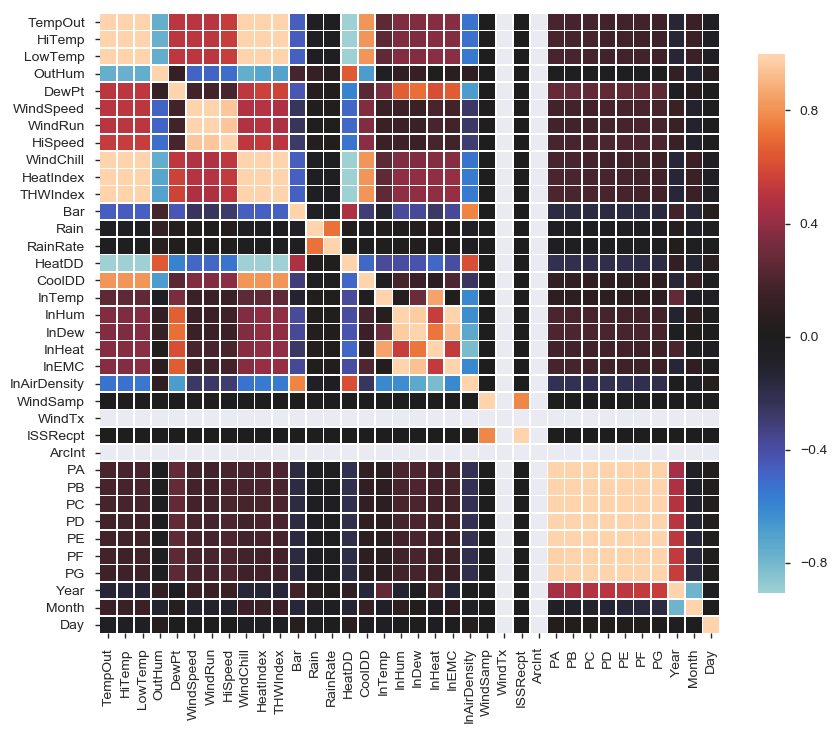

In [45]:
# www.kaggle.com
def correlation_heatmap(train_data):
    correlations = train_data.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5,  cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(train_data)

### Inferences:
1. We can see high correlations between TWHIndex, WindChill and HeatIndex.
1. We can see high correlations between TempOut, HighTemp and LowTemp.
1. We can see high correlations between WindSpeed, WindRun and HiSpeed.

# Conclusion:
> Correlations are very useful in many applications, especially when conducting regression analysis. However, it should not be mixed with causality and misinterpreted in any way. You should also always check the correlation between different variables in your dataset and gather some insights as part of your exploration and analysis.

#### How Can I Deal With This Problem?
> There are multiple ways to deal with this problem. The easiest way is to delete or eliminate one of the perfectly correlated features

#### Multicollinearity
> If your dataset has perfectly positive or negative attributes then there is a high chance that the performance of the model will be impacted by a problem called — “Multicollinearity”. Multicollinearity happens when one predictor variable in a multiple regression model can be linearly predicted from the others with a high degree of accuracy. This can lead to skewed or misleading results.